# EXECUTIVE SUMMARY



Given training dataset consisting information about **101891 car insurance quotes data** in 'Cooperators_Quotes_Dataset_Training.xlsx' and some test data in 'Cooperators_Quotes_Dataset_Test.xlsx' to predict whether the individual who asked for the quote actually took the insurance policy.

The training dataset contains **25 feature columns** (e.g. QUOTE_DATE, VEHICLE_MAKE etc) and a **target column 'IS_BOUND'**. Our task is to predict the target column 'IS_BOUND' on the given test dataset.


* First, we **loaded the training and test dataset** and  applied pre-processing after **combining the test and train** dataset to encode the for similar preprocessing of train and test data.
* To handle with missing values, we **dropped the columns that has high proportions of missing values**(above 90%).
* **Imputing some columns with NAN** values by **most frequent value** or **group-wise mean** was one of the data filling method for empty rows.
* For **categorical columns**, each unique category was converted into columns by **applying one hot encoding** to convert it into numerical values.
* Also, **Identifying the outliers** by checking out the relations and observing the data points by visualising them into the scatter plot helped to remove the influential points that can be diverting the prediction value from the actual output.
* After pre-processing of dataset, we trained the models for predictions which are :
  * **Logistic regression model** where hyperparameter tuning was tried by modyfying the weight of the target categories(i.e.: 1 and 0).
  * **Naive bayes**  by trying to to predict the binary outcome after ensuring the numeric features are standardized and checking out the best prediction accuracy by modying the value of alpha.
* Additionally, we applied **standardization to numeric features** to have a consistent scale which was then used by the model sto predict the target column and also calcualte the overall performance of the model.
* **Plotting ROC curves** for both the logistic regression model and naive bayes model helped us to understand whether the model is actually predicting the outputs or predicting by randomly section the output. By looking at the plots, we can say that since the AUC(Area Under the ROC Curve) for **naive bayes model is higher** than that of logistic regression model, **Naive bayes model provides better prediction** than logistic regression model. Because, higher AUC represents the better overall performance of the model.

We submitted the predcited values for the given test dataset to the leaderboard. The outcome that got is as follows:


*   ***Logistic Regression model***:
  * Accuracy: 61,
  * False positive rate percent: 31,
  * False negative rate percent: 66,
  * Revenue: 1

*   **Naive Bayes model(FINAL CONSIDERED MODEL):**
  * Accuracy: 52,
  * False positive rate percent : 51,
  * False negative rate percent: 29,
  * **Revenue: 16**


**FINAL CONSIDERED MODEL :** Naive Bayes has been considered as the final predicting model as it displays the capability to predict and differentiate the response feature with an auc score of 0.65.




# DATA PRE-PROCESSING

In [ ]:
###
# Import libraries
###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###
# Load the training dataset
###
train_datasource = pd.read_excel('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Training.xlsx')
###
# Load the test dataset
###
test_datasource = pd.read_excel('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Test.xlsx')

In [ ]:
#CHANGE THE FILE TO CSV
train_datasource.to_csv('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Training.csv')
test_datasource.to_csv('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Test.csv')


train_df = train_df.drop(columns=[train_df.columns[0]],axis=1)
test_df = test_df.drop(columns=[test_df.columns[0]],axis=1)

<ipython-input-52-d67ee632220c>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Training.csv')


In [ ]:
###
# Modifying the column names so that test data and train data both have similar column names
###
train_df.columns = train_df.columns.str.replace('_', '')
print(train_df.columns,'\n')

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUALKM',
       'COMMUTEDISTANCE', 'MARKINGSYSTEM', 'TRACKINGSYSTEM',
       'VEHICLEOWNERSHIP', 'VEHICLEVALUE', 'VEHICLEUSE', 'GENDER',
       'YEAROFBIRTH', 'POSTALCODE', 'AREACODE', 'YEARSLICENSED',
       'YEARSASPRINCIPALDRIVER', 'MULTIPRODUCT', 'MARITALSTATUS', 'OCCUPATION',
       'CONVICTIONCOUNTMINOR3YRS', 'CONVICTIONCOUNTMAJOR3YRS',
       'CONVICTIONCOUNTCRIMINAL3YRS', 'ASSIGNEDLOSSESPD5YRS',
       'SUSPENSIONCOUNT', 'ISBOUND'],
      dtype='object') 



In [ ]:
# Combining the train and test  for similar data prepro
combined_data = pd.concat([train_df, test_df], axis=0)
combined_data

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUALKM,COMMUTEDISTANCE,MARKINGSYSTEM,TRACKINGSYSTEM,VEHICLEOWNERSHIP,VEHICLEVALUE,...,YEARSASPRINCIPALDRIVER,MULTIPRODUCT,MARITALSTATUS,OCCUPATION,CONVICTIONCOUNTMINOR3YRS,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT,ISBOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN
15110,2017-02-27,2011,BMW,323i 4DR,10000.0,8.0,NaN,NaN,NaN,12418.0,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
15111,2017-02-27,2007,HONDA TRUCK/VAN,ODYSSEY LX,15000.0,5.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
15112,2017-02-27,2014,HONDA TRUCK/VAN,CRV,12000.0,13.0,NaN,NaN,NaN,35000.0,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN


In [ ]:
df=combined_data.copy()

## **Handle Missing Values**

#### **1. Drop the columns with High proportions of missing values**

Firstly,the proportion of missing values were calculated in each column and then sorted in descending order to see the column with higher ratio of missing values. As 'TRACKINGSYSTEM', 'MARKINGSYSTEM','YEARSASPRINCIPALDRIVER' have more than 99 percent of missing values, which were dropped.

In [ ]:
###
# In this code block, the columns were sorted in descending order of proportion of missing value
###

# Finding the proportion of missing values in each column
number_of_rows = len(df)
count_missing_val = df.isna().sum()
missing_data = count_missing_val / number_of_rows
# Sorting tha columns with descending order of proportion of missing value
missing_data = missing_data[missing_data>0].sort_values(ascending = False)
# Print the proportion of missing data in descending order
missing_data

TRACKINGSYSTEM            0.999949
MARKINGSYSTEM             0.999624
YEARSASPRINCIPALDRIVER    0.993334
VEHICLEOWNERSHIP          0.751677
VEHICLEVALUE              0.639562
COMMUTEDISTANCE           0.347028
ISBOUND                   0.129174
YEARSLICENSED             0.000094
GENDER                    0.000043
ANNUALKM                  0.000009
OCCUPATION                0.000009
dtype: float64

<BarContainer object of 11 artists>

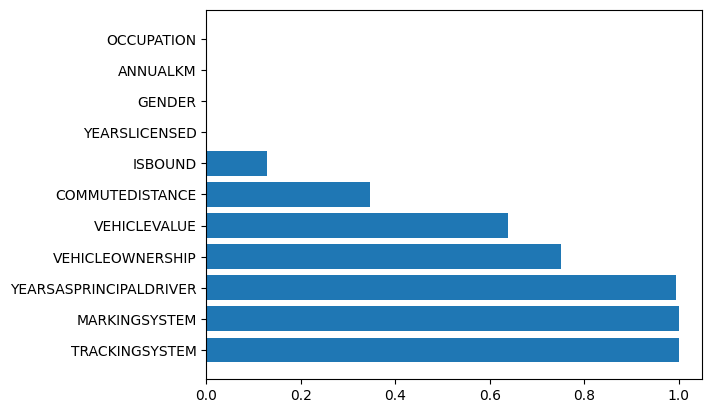

In [ ]:
###
# Create a bar plot to better visualize
###
plt.barh(missing_data.index, missing_data.values)

In [ ]:
###
# Removing columns with high proportion of missing values
###
df = df.drop(['TRACKINGSYSTEM','MARKINGSYSTEM','YEARSASPRINCIPALDRIVER'], axis = 1)

In [ ]:
###
# Viewing the dataframe information including column name, data type
###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117005 entries, 0 to 15113
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   QUOTEDATE                    117005 non-null  object 
 1   VEHICLEYEAR                  117005 non-null  int64  
 2   VEHICLEMAKE                  117005 non-null  object 
 3   VEHICLEMODEL                 117005 non-null  object 
 4   ANNUALKM                     117004 non-null  float64
 5   COMMUTEDISTANCE              76401 non-null   float64
 6   VEHICLEOWNERSHIP             29055 non-null   object 
 7   VEHICLEVALUE                 42173 non-null   float64
 8   VEHICLEUSE                   117005 non-null  object 
 9   GENDER                       117000 non-null  object 
 10  YEAROFBIRTH                  117005 non-null  int64  
 11  POSTALCODE                   117005 non-null  object 
 12  AREACODE                     117005 non-null  object 
 13  

#### Year Extraction from QUOTEDATE column

In [ ]:
# Converting the 'QUOTEDATE' column to datetime format
df['QUOTEDATE'] = pd.to_datetime(df['QUOTEDATE'], errors ='coerce')

# Storing only the year information in that column
df['QUOTEDATE'] = df['QUOTEDATE'].dt.year

#### Imputing the missing values

In [ ]:
## Replacing the NaN value with string 'Not Known'
df['VEHICLEOWNERSHIP'] = df['VEHICLEOWNERSHIP'].fillna('Not Known')

In [ ]:
## Impute the missing values for YEARSLICENSED column with 0
df['YEARSLICENSED'] = df['YEARSLICENSED'].fillna(0).astype('int64')

In [ ]:
## Impute the missing values for GENDER and OCCUPATION Columns with the most frequent value

df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['OCCUPATION'] = df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0])

In [ ]:
###
# In this code block, we Replaced the NaN and 1 values in the VEHICLEVALUE Column
###

df['VEHICLEVALUE'] =  df['VEHICLEVALUE'].replace(1.0,'NAN')
df['VEHICLEVALUE'] = df['VEHICLEVALUE'].replace('NAN', pd.NA)

## For imputing , first I grouped the data by VEHICLEMODEL
vehicle_model_group = df.groupby(['VEHICLEMODEL'])

## Now, imputing the missing values with mean of each VEHICLEMODEL group
df['VEHICLEVALUE'] = vehicle_model_group['VEHICLEVALUE'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
## counting the NaN values for VEHICLEVALUE Column
df['VEHICLEVALUE'].isna().sum()

3143

In [ ]:
###
# Since, there are more Nan Values for VEHICLEVALUE column,
# in this code block, We impute the missing values with mean of each VEHICLEUSE group
###

#First, we grouped the data by VEHICLEUSE
vehicle_use_group = df.groupby(['VEHICLEUSE'])


In [ ]:
vehicle_use_group.describe()[['VEHICLEVALUE']]

VEHICLEVALUE                              \
                                        count          mean           std   
VEHICLEUSE                                                                  
Business                               2738.0  29600.773369  15336.467120   
Commute                               72240.0  22673.106392  13381.024079   
Courtesy Car                             27.0  21657.652169  10675.694359   
Driver Training                          35.0  25850.780270  36080.967727   
Farm Pleasure                           484.0  29198.171419  15976.337391   
Fire Department -  Non-Emergency          1.0   7500.000000           NaN   
Fire Department - Emergency               1.0  10000.000000           NaN   
Fisherman                                 2.0  14392.869048   4663.554417   
Pleasure                              38329.0  23745.600997  15813.780676   
Police Emergency/Patrol                   4.0  31713.357942  20161.907326   
Rally                                     1.0  30000.000000           NaN   

                                                                            \
                                           min           25%           50%   
VEHICLEUSE                                                                   
Business                              2.000000  20000.000000  27000.000000   
Commute                               0.000000  15000.000000  20651.122715   
Courtesy Car                       1000.000000  16250.000000  19454.293388   
Driver Training                    7191.923077  15295.180354  20000.000000   
Farm Pleasure                      1000.000000  18093.750000  28291.583333   
Fire Department -  Non-Emergency   7500.000000   7500.000000   7500.000000   
Fire Department - Emergency       10000.000000  10000.000000  10000.000000   
Fisherman                         11095.238095  12744.053571  14392.869048   
Pleasure                              2.000000  15000.000000  21550.102273   
Police Emergency/Patrol           16186.765101  19046.691275  25000.000000   
Rally                             30000.000000  30000.000000  30000.000000   

                                                               
                                           75%            max  
VEHICLEUSE                                                     
Business                          38262.777778  115936.000000  
Commute                           28782.696970  425000.000000  
Courtesy Car                      28000.000000   44333.333333  
Driver Training                   23637.057558  230000.000000  
Farm Pleasure                     37572.400000   85000.000000  
Fire Department -  Non-Emergency   7500.000000    7500.000000  
Fire Department - Emergency       10000.000000   10000.000000  
Fisherman                         16041.684524   17690.500000  
Pleasure                          30000.000000  800000.000000  
Police Emergency/Patrol           37666.666667   60666.666667  
Rally                             30000.000000   30000.000000

In [ ]:
## Now, imputing the missing values with mean of each VEHICLEUSE group
df['VEHICLEVALUE'] = vehicle_use_group['VEHICLEVALUE'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
## counting the NaN values for VEHICLEVALUE Column
df['VEHICLEVALUE'].isna().sum()

0

In [ ]:
###
# In this code block, we impute the missing values for ANNUALKM
###

# #First, we grouped the data by VEHICLEUSE
vehicle_use_group = df.groupby(['VEHICLEUSE'])

## Now, imputing the missing values with mean of each VEHICLEUSE group
df['ANNUALKM'] = vehicle_use_group['ANNUALKM'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
###
# Viewing statistics for COMMUTEDISTANCE for each VEHICLEUSE group
###
vehicle_use_group.describe()[['COMMUTEDISTANCE']]


COMMUTEDISTANCE                            \
                                           count         mean          std   
VEHICLEUSE                                                                   
Business                                   281.0    89.274021  1192.223109   
Commute                                  73862.0    37.054927   624.096476   
Courtesy Car                                28.0    18.750000    28.152528   
Driver Training                             36.0    21.888889    31.455890   
Farm Pleasure                               19.0  1065.157895  4585.305652   
Fire Department -  Non-Emergency             1.0     1.000000          NaN   
Fire Department - Emergency                  1.0     3.000000          NaN   
Fisherman                                    2.0     8.000000    11.313708   
Pleasure                                  2166.0   297.072946  2816.934855   
Police Emergency/Patrol                      4.0     1.750000     2.362908   
Rally                                        1.0     0.000000          NaN   

                                                                   
                                  min   25%   50%    75%      max  
VEHICLEUSE                                                         
Business                          0.0  10.0  15.0  20.00  20000.0  
Commute                           0.0   7.0  10.0  16.00  30000.0  
Courtesy Car                      2.0   8.0  10.0  16.25    150.0  
Driver Training                   0.0   0.0  10.0  26.25    150.0  
Farm Pleasure                     0.0   6.5  10.0  15.50  20000.0  
Fire Department -  Non-Emergency  1.0   1.0   1.0   1.00      1.0  
Fire Department - Emergency       3.0   3.0   3.0   3.00      3.0  
Fisherman                         0.0   4.0   8.0  12.00     16.0  
Pleasure                          0.0   0.0  10.0  15.00  98000.0  
Police Emergency/Patrol           0.0   0.0   1.0   2.75      5.0  
Rally                             0.0   0.0   0.0   0.00      0.0

In [ ]:
###
# In this code block, We impute the missing values for COMMUTEDISTANCE
###

# Calcuating median for COMMUTEDISTANCE for each VEHICLEUSE group
median_commute_distance = df.groupby('VEHICLEUSE')['COMMUTEDISTANCE'].transform('median')

# Now, imputing the missing values with this calculated median
df['COMMUTEDISTANCE'] = df['COMMUTEDISTANCE'].fillna(median_commute_distance)

<Axes: >

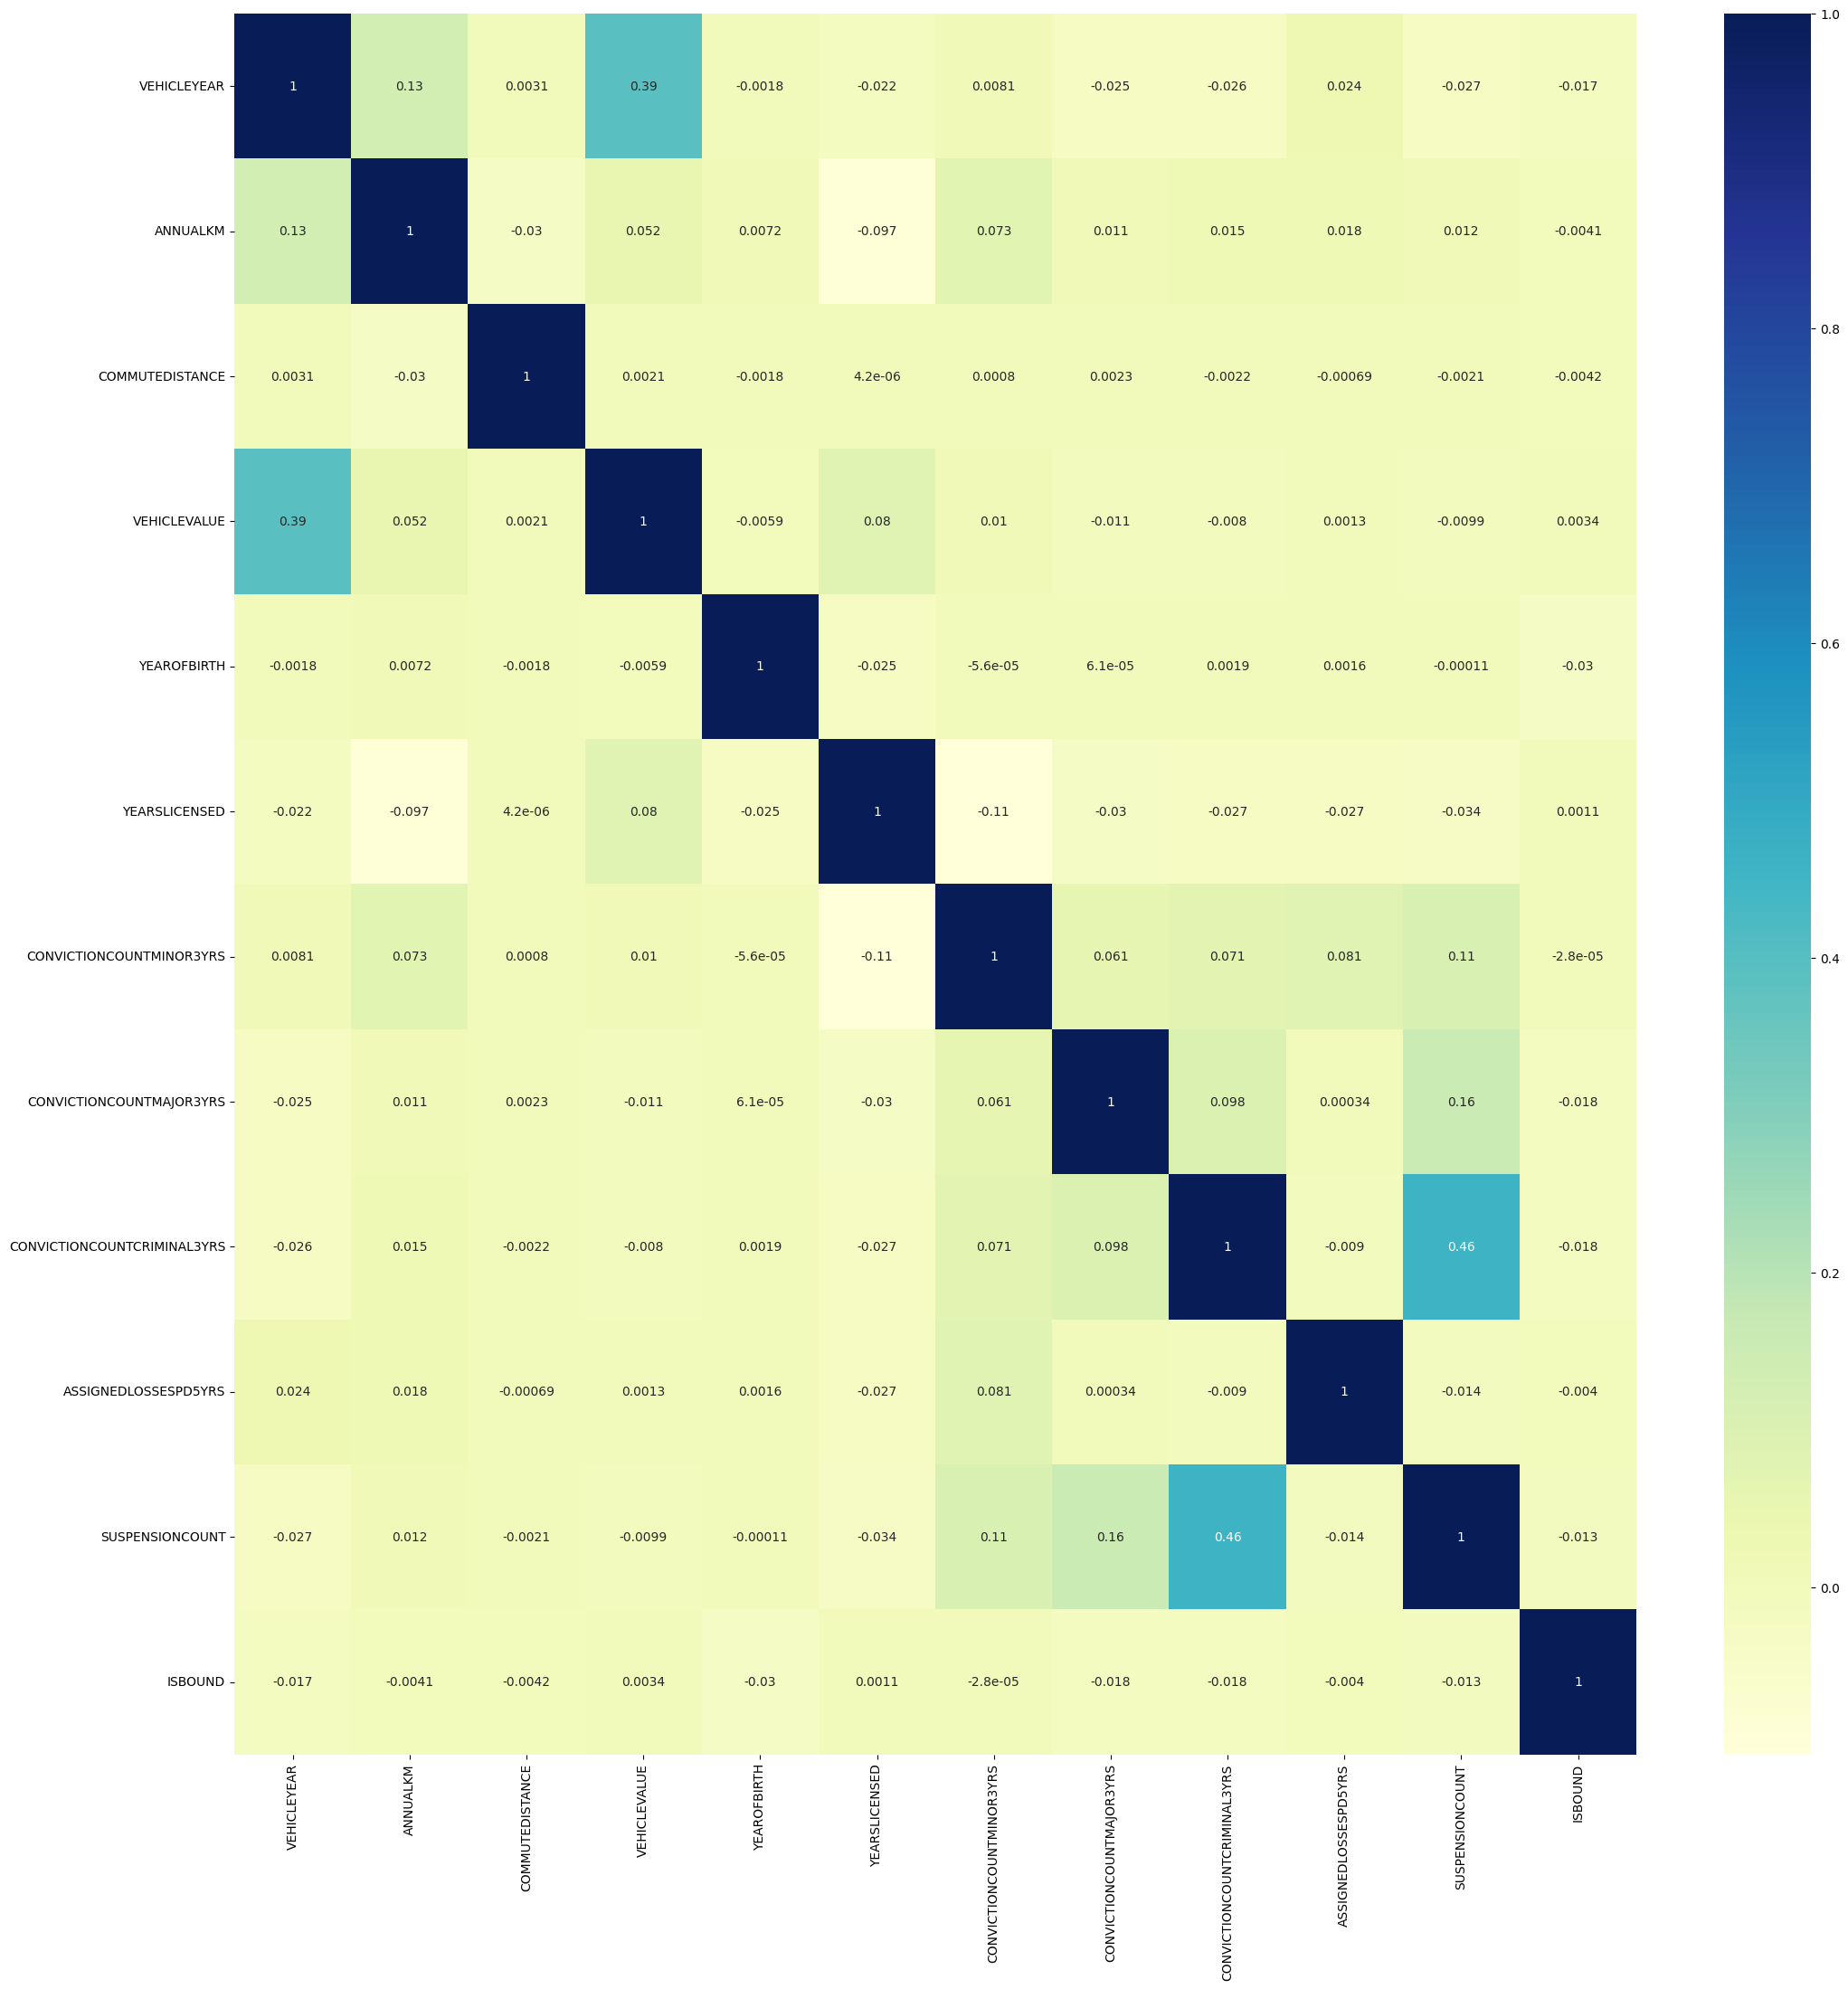

In [ ]:
num_cols = ['VEHICLEYEAR', 'ANNUALKM', 'COMMUTEDISTANCE', 'VEHICLEVALUE', 'YEAROFBIRTH', 'YEARSLICENSED', 'CONVICTIONCOUNTMINOR3YRS', 'CONVICTIONCOUNTMAJOR3YRS', 'CONVICTIONCOUNTCRIMINAL3YRS', 'ASSIGNEDLOSSESPD5YRS', 'SUSPENSIONCOUNT', 'ISBOUND']
plt.figure(figsize=(25,25))
sns.heatmap(df[num_cols].corr(),annot=True,cmap="YlGnBu")

Here we are dropping some of the features due to an abnormal behaviour and a higher variation in the data which led to low training accuracy.
* **Vehicle Model :** As the number of categories of vehicle model is much higher and mistakes in the vehicle name led to a poor evaluation of the data encoder hence making the data prediction harder , hence removing the feature made the model much robust then keeping it.
* **Vehicle Ownership :** By checking the data more than half of the rows seemed to have irrelevancy whether the car was actually owned or not, which led to removal of this feature.
* **Conviction Count minor 3 yrs :** As we can see a very low correlation to the target feature we can drop this column as well.
* **Vehicle Use , Multiproduct , AreaCode :** Considering these columns led to a lower prediction accuracy hence dropping the column showed a better result in predicting the model output.

In [ ]:
###
# In this code block, we dropped some feature columns due to the variable nature of the feature , resulting in lowering down the train accuracy.
###

df = df.drop(['VEHICLEMODEL','AREACODE','VEHICLEOWNERSHIP','MULTIPRODUCT',
             'CONVICTIONCOUNTMINOR3YRS','VEHICLEUSE'], axis = 1)

#### **One-hot-encoding for Categorical Data**

While converting categorical columns to one-hot-encoding, each unique category is represented as a column and  if a datapoint falls in that category, 1 is assigned for that column and otherwise 0 is assigned

In [ ]:
###
# In this code block, I applied one hot encoding
###

# Get the categorical data
categorical_data = df.select_dtypes(include = 'object')

## get the categorical column names
categorical_column_name = categorical_data.columns.tolist()

#applying ONE HOT ENCODING
df = pd.get_dummies (df, columns = categorical_column_name)

In [ ]:
###
# In this code block, We split the train and test dataset
###

train_df_size = len(train_df)
train_df = df[0 : train_df_size]
test_df = df[train_df_size : ]

In [ ]:
# view the rows and columns of train dataset
train_df.shape

(101891, 1500)

In [ ]:
# view the rows and columns of test dataset
test_df.shape

(15114, 1500)

#### **Handling outliers for training dataset**

Identifying the outliers by observing the data trends and abnormality in the data points from the other data points is one of the methods which were used to eliminate them.


In [ ]:
# Here we have identified the numerical features
numerical_columns = ['QUOTEDATE', 'VEHICLEYEAR', 'ANNUALKM', 'COMMUTEDISTANCE', 'VEHICLEVALUE', 'YEAROFBIRTH', 'YEARSLICENSED', 'CONVICTIONCOUNTMAJOR3YRS', 'CONVICTIONCOUNTCRIMINAL3YRS', 'ASSIGNEDLOSSESPD5YRS', 'SUSPENSIONCOUNT']

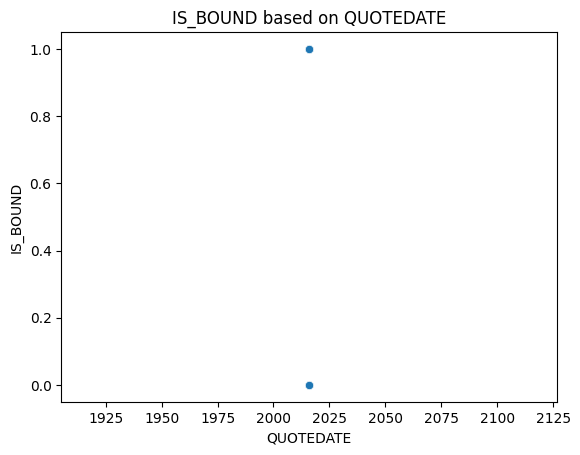

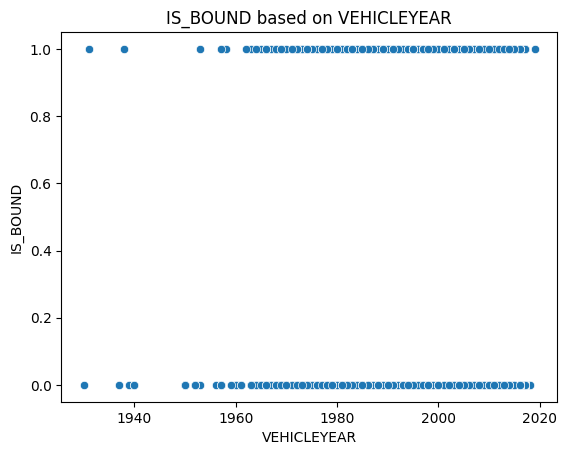

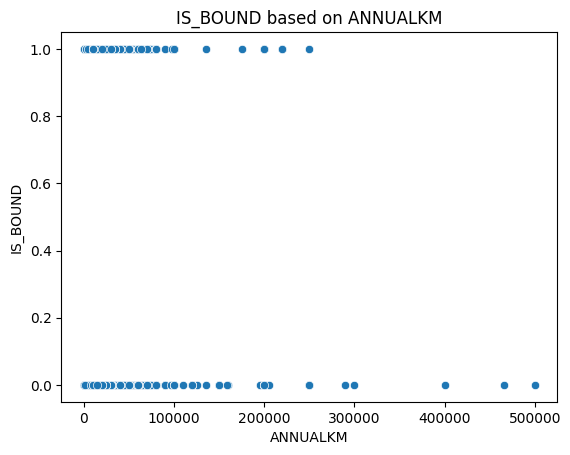

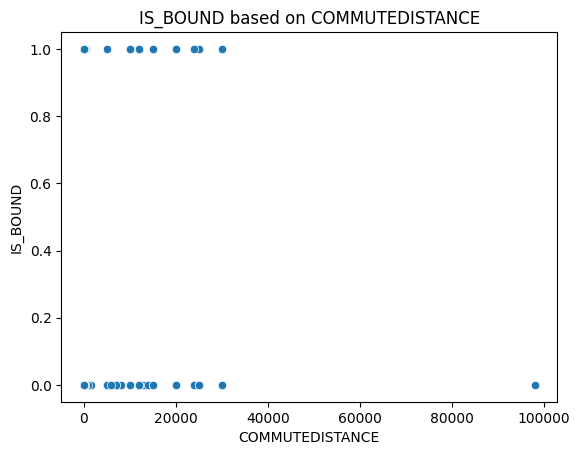

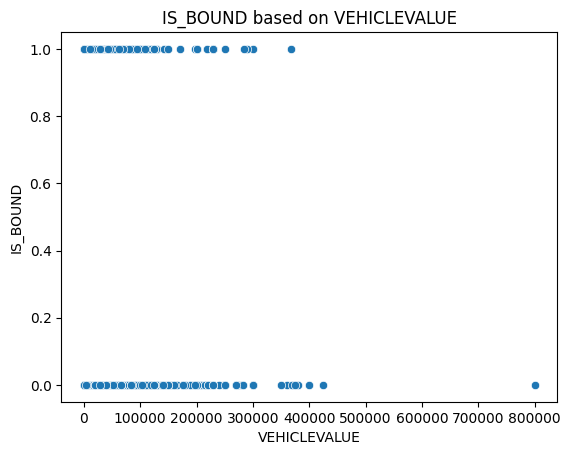

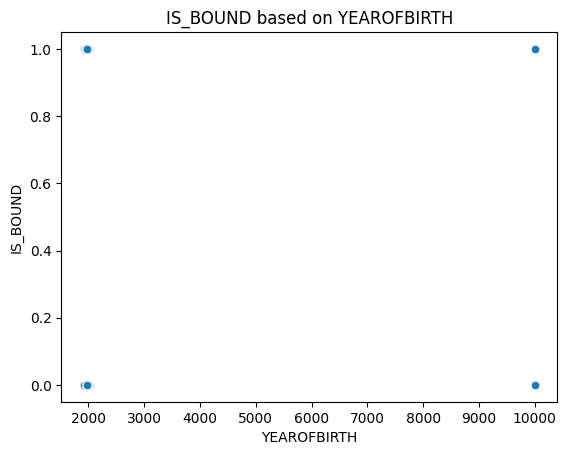

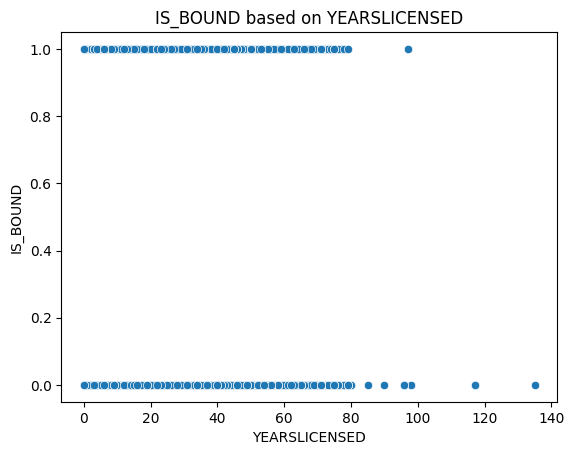

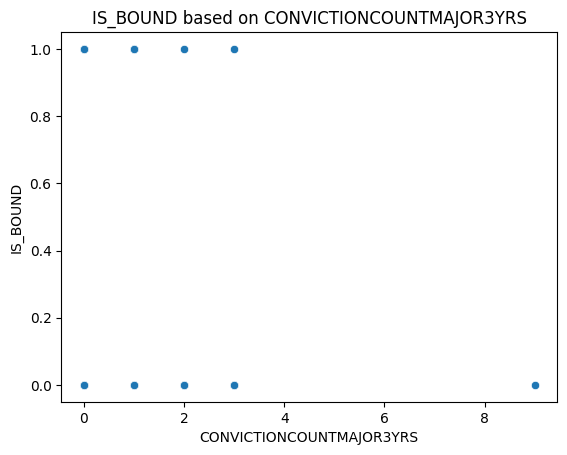

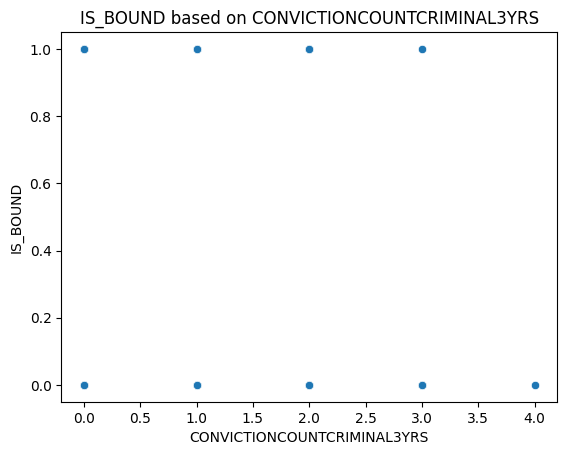

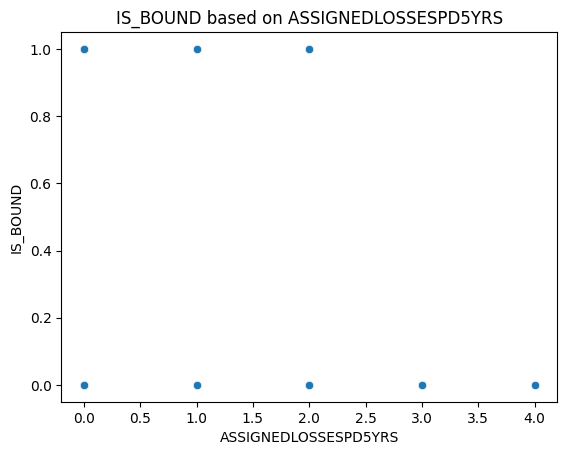

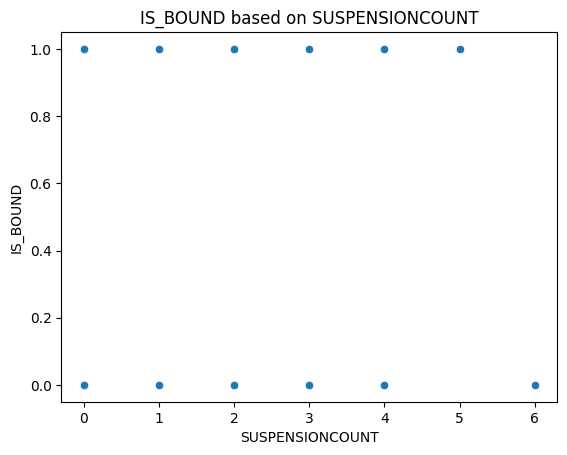

In [ ]:
# scatterplot for each numerical features to detect outliers
for features in numerical_columns:
  plt.figure()
  sns.scatterplot(df, x = features , y='ISBOUND')
  plt.ylabel('IS_BOUND')
  plt.title(f'IS_BOUND based on {features}')

plt.show()

In [ ]:
train_df[numerical_columns].describe()

,QUOTEDATE,VEHICLEYEAR,ANNUALKM,COMMUTEDISTANCE,VEHICLEVALUE,YEAROFBIRTH,YEARSLICENSED,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT
count,101891.0,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000
mean,2016.0,2008.899677,14912.367407,35.829327,23151.818873,2003.034301,20.746778,0.003582,0.006085,0.058298,0.007115
std,0.0,5.823742,8255.162742,678.521012,14266.486982,485.606875,16.252691,0.070310,0.086265,0.243670,0.104836
min,2016.0,1930.000000,0.000000,0.000000,0.000000,1918.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2005.000000,10000.000000,10.000000,15196.400000,1962.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,2010.000000,15000.000000,10.000000,21318.500000,1975.000000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,2013.000000,20000.000000,15.000000,29612.813187,1988.000000,33.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,2019.000000,500000.000000,98000.000000,800000.000000,9999.000000,135.000000,9.000000,4.000000,4.000000,6.000000


In [ ]:
###
# In this code block, we removed the outliers
###

train_df = train_df[~ ((train_df['COMMUTEDISTANCE'] > 90000))] # As considering a real scenario , commute distance cannot be 90000 or above
train_df = train_df[~ ((train_df['YEAROFBIRTH'] > 2023))] # Year of birth cant be after the current year
train_df = train_df[~ ((train_df['YEARSLICENSED'] > 120))] # Its rare to see a person above 120 that is licensed.

In [ ]:
## View the number of rows and columns of train dataset after pre-processing
train_df.shape

(101515, 1500)

# **Modelling and Model Tuning**

In [ ]:
## dropping the ISBOUND column to get the feature columns for train dataset
X = train_df.drop('ISBOUND', axis = 1)
## target column
y = train_df['ISBOUND']

## **Modelling with Logistic Regression**

Primarily regarded as a classification algorithm Logistic regression would be modelling the relationship between log odds of the dependent variable.

Here specifically we have used logistic regression along with performing the hyperparameter tuning where following parameters were considered after testing with all the parameters present for tuning the model:
* Firstly as we know that row count for 0 as INBOUND is much larger than the one with 1 INBOUND, hence weight was given to 1 to be considered for the model to learn and also lower the bias from 0 towards 1.
* After running a grid search to find out the best parameters for the logistic regression model l2 as the penalty and lbffgs as solver was considered with a weight of 0.7 for '1' and '0.3' for '0'.

Brief on grid search : To evaluate multiple parameters and find the most optimal parameter pairs, grid search is used for hyper parameter tuning for the logistic model.

(NOTE : Also to accomodate the logistic regression model with the large dataset , we have considered to take batch size of 600 and train the model batch wise to handle the whole dataset.)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

##
# This code block implements grid search, to find the optimal pairs of parameter for hyperparameter tuning.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a scaler and logistic regression
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # You can choose a different scaler if needed
    ('classifier', LogisticRegression())
])

# Define the hyperparameter grid to search
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # or 'elasticnet' if using Elastic Net
    'classifier__solver': ['liblinear', 'newton-cg', 'lbfgs'],  # Add additional solvers if needed
    'classifier__class_weight': [{0: 0.35, 1: 0.65}]  # Adjust class weights as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric for your problem
    cv=5  # Number of cross-validation folds
)


# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'classifier__class_weight': {0: 0.35, 1: 0.65}, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Accuracy on Test Set: 0.7800


In [ ]:
###
# In this code block , we applied batch-wise training of logistic regression model after standardizing the numeric features
## Also, After making prediction on the test port portion, we measured overall performance of the model
###

def modelling_with_LR(X_train, y_train, X_test, y_test):

  x = 0.65 # For weight consideration of the class
  LR_model = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=600, class_weight={1: x, 0: 1-x})

  #Setting batch size
  batch_size = 600

  ## model training is performed in batches based on specified batch size
  for i in range(0, len(X_train), batch_size):
    X_batch = X_train.iloc[i:i+batch_size, :]
    y_batch = y_train.iloc[i:i+batch_size]

    # fit the model
    LR_model.fit(X_batch, y_batch)

  # Now, making prediction the test portion
  y_pred = LR_model.predict(X_test)

  # CALCULATING ACCURACY OF THE MODEL
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy : {accuracy}")

  # Calculating confusion matrix
  confusion_Matrix = confusion_matrix(y_test,y_pred)
  print("\n Confusion Matrix: ")
  print(confusion_Matrix)

  # Calculating the classsification Report
  classificationReport = classification_report(y_test, y_pred)
  print("\n Classification Report :")
  print("\n")
  print(classificationReport)


  return accuracy, confusion_Matrix, LR_model


In [ ]:
## Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

accuracy, confusion_Matrix, LR_model = modelling_with_LR(X_train,y_train, X_test, y_test)

Accuracy : 0.7378219967492489

 Confusion Matrix: 
[[14672  1217]
 [ 4106   308]]

 Classification Report :


              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85     15889
         1.0       0.20      0.07      0.10      4414

    accuracy                           0.74     20303
   macro avg       0.49      0.50      0.48     20303
weighted avg       0.66      0.74      0.68     20303



In [ ]:
###
# In this code block, We predicted the ISBOUND column on the test dataset
###

X_test_data = test_df.drop('ISBOUND', axis =1)

## We are making predictions on the test set
y_pred = LR_model.predict(X_test_data)

prediction_list = y_pred.tolist()
int_list_predictions = [int(x) for x in prediction_list]
## Printin the predicted result
print(int_list_predictions)

[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **Naive Bayes Model**

Naive Bayes is also known as a **probabilistic classifier** since it is based on **Bayes Theorem**.

Keeping in mind the target variable which is binary data we have used **Bernoulli's Naive Bayes model** which is one of the variants of naive bayes, to train the model for the prediction of the target column.

The numerical data was considered to be standardized where **Robust Scaler** was used which uses **median and interquartile range** for the standardization of the numerical values which would help us to act with outliers if there are any present according to the model fit.

Fitting and predicting the model with various values of **alpha** which represents the **smoothness of the curve** helps to handle the model in regards of the sensitiveness of the data. After multiple testing of the alpha values, **alpha=0.15** was considered to be the final alpha value which returned the best results when checked for prediction accuracy.



In [ ]:
# ###
# # In this code block , we trained bernoulli naive bayes model after standardizing the numeric features with robust scaler
# ## Also, After making prediction on the test port portion, we measured overall performance of the model
# ###

from sklearn.preprocessing import MaxAbsScaler

from sklearn.naive_bayes import BernoulliNB

def naive_bayes_model_training(X_train, X_test, y_train, y_test):
  std_scaler =  RobustScaler()
  X_train[numerical_columns] = std_scaler.fit_transform(X_train[numerical_columns])
  X_test[numerical_columns] = std_scaler.fit_transform(X_test[numerical_columns])

  naive_bayes_model = BernoulliNB(alpha = 0.15)

  ## Fit the model
  naive_bayes_model.fit(X_train, y_train)

  # Now, making prediction the test portion
  y_pred = naive_bayes_model.predict(X_test)

  ##Calculate accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy : {accuracy}")

  # Calculating confusion matrix
  confusion_Matrix = confusion_matrix(y_test,y_pred)
  print("\n Confusion Matrix :")
  print(confusion_Matrix)

  # Calculating the classsification Report
  classificationReport = classification_report(y_test, y_pred)
  print("\n Classification Report :")
  print(classificationReport)

  return accuracy, confusion_Matrix, naive_bayes_model

In [ ]:
## split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

accuracy, confusion_Matrix, naive_bayes_model = naive_bayes_model_training(X_train, X_test, y_train, y_test)

Accuracy : 0.7792444466335025

 Confusion Matrix :
[[15789   100]
 [ 4382    32]]

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.88     15889
         1.0       0.24      0.01      0.01      4414

    accuracy                           0.78     20303
   macro avg       0.51      0.50      0.44     20303
weighted avg       0.67      0.78      0.69     20303



In [ ]:
# run the model  agin on the entire training dataset
accuracy, confusion_Matrix, naive_bayes_model = naive_bayes_model_training(X_train = X, X_test = X, y_train = y, y_test =y)

Accuracy : 0.7811948973058169

 Confusion Matrix :
[[79074   152]
 [22060   229]]

 Classification Report :
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     79226
         1.0       0.60      0.01      0.02     22289

    accuracy                           0.78    101515
   macro avg       0.69      0.50      0.45    101515
weighted avg       0.74      0.78      0.69    101515



In [ ]:
###
# In this code block, We predicted the ISBOUND column on the test dataset
###

X_test_data = test_df.drop('ISBOUND', axis =1)

## We are making predictions on the test set
y_pred = naive_bayes_model.predict(X_test_data)

prediction_list = y_pred.tolist()
int_list_predictions = [int(x) for x in prediction_list]
## Printin the predicted result
print(int_list_predictions)

[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 

## ROC-AUC Score Curve

* The ROC curve is a graphical representation of the trade-off between true positive rate and false positive rate across different thresholds.

* To compare the performance of different classifiers we used AUC-ROC score which generally indicates better discrimination between positive and negative instances.

In [ ]:
from sklearn import metrics
###
#In this code block, a method for plotting ROC curve
#which helps to visualize how well a model can distinguish between two classes
###

def plot_ROC_Curve(Y, prediction):

  ## Calculating false positive rate (fpr), true positive rate (tpr) and decision threshold(threshold)
  fpr, tpr, threshold = metrics.roc_curve(Y, prediction)

  ## Calculating the Area Under the Curve(AUC) for the ROC curve
  ## AUC measures the overall model performance
  roc_auc = metrics.auc(fpr,tpr)

  plt.title('ROC (Receiver Operating Characteristic) Curve')
  plt.plot(fpr,tpr,'b', label = 'AUC =%0.2F' % roc_auc)
  plt.plot([0,1],[0,1], 'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()



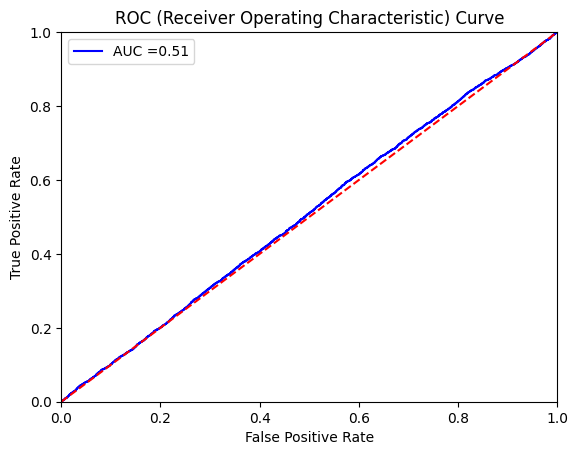

In [ ]:
###
#In this code block, I plotted ROC curve for LOGISTIC REGRESSION MODEL
###

## Using the logistic regression model, We predicted the probabilities of the positive class
y_pred_prob_LR = LR_model.predict_proba(X_test)[:, 1]
## Call the the plot_ROC_Curve method to plot the ROC Curve
plot_ROC_Curve(y_test,y_pred_prob_LR)

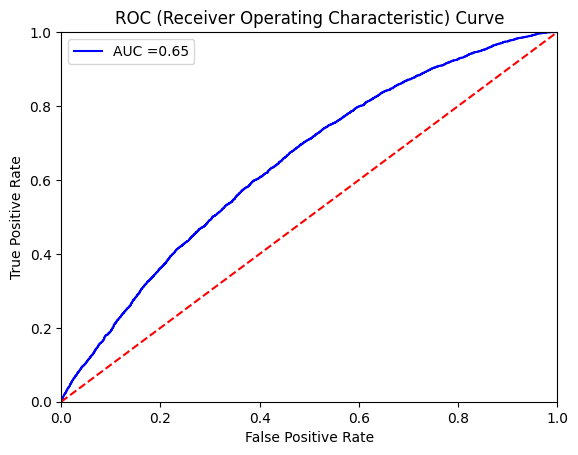

In [ ]:
###
#In this code block, I plotted ROC curve for NAIVE BAYES MODEL
###

## Using the naive bayes model, We predicted the probabilities of the positive class
y_pred_prob_NB = naive_bayes_model.predict_proba(X_test)[:, 1]

## Call the the plot_ROC_Curve method to plot the ROC Curve
plot_ROC_Curve(y_test,y_pred_prob_NB)

## Comparison By Observing ROC Curve

* **LOGISTIC REGRESSION MODEL**

  * With an A ROC-AUC of 0.51 concludes that the Logistic Regression model is performing no better than random chance.
  * The ROC curve is essentially a diagonal line, indicating that the model has an equal chance of making true positive and false positive predictions.
  



* **NAIVE BAYES MODEL**
 * With an ROC-AUC of 0.65 is better than random chance as compared to the logistic regression.
 * By this we can comprehend that the model has some ability to distinguish between the classes of ISBOUND ( i.e: 1 or 0).

  So, Since AUC of the ROC curve for naive bayes model is higher, **Naive bayes provides better prediction and has better distinguishing capacity** between the classes of target column 'ISBOUND' compared to logistic regression model.